# 1. Data Exploration

In [89]:
# Import data manipulation libraries
import numpy as np
import pandas as pd

# Import data visualisation libraries
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import rc
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Set graph defaults
plt.rc('font', family='serif', size=10)
plt.rc('legend', fontsize=10)
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['CMU Serif']
plt.rcParams['axes.unicode_minus'] = False

In [277]:
# Read in data
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")
X_test = pd.read_csv("X_test.csv")

### 1.1 Data Summary

In [3]:
# Merge data
df = y_train.join(X_train)

# View sample of data
df.head()

,class,ra,dec,rowv,colv,sky_u,sky_g,sky_r,sky_i,sky_z,...,psffwhm_z,redshift,waveMin,waveMax,wCoverage,spectroFlux_u,spectroFlux_g,spectroFlux_r,spectroFlux_i,spectroFlux_z
0,GALAXY,193.501580,-3.151499,0.001558,-0.003090,1.485249,1.918151,4.959499,10.499020,32.93853,...,1.294442,0.084459,3797.519,9200.258,0.3679,6.787869,16.94696,36.79082,55.93771,71.01184
1,STAR,193.285642,49.189768,-0.000454,0.002103,0.995259,1.377672,3.382322,7.532795,24.20448,...,1.124869,-0.000174,3801.894,9183.326,0.3692,39.508860,70.64217,116.61060,145.60520,160.23250
2,GALAXY,150.991449,6.370981,-0.002789,-0.003372,1.061719,1.655002,3.331498,5.424337,14.75673,...,1.171532,0.118706,3823.843,9183.326,0.3775,13.236710,43.51529,114.39910,170.16740,227.93710
3,GALAXY,187.682335,-2.672471,-0.000691,-0.003080,1.267892,1.849097,5.440842,10.755410,34.14946,...,1.431124,0.091831,3805.397,9206.615,0.3792,8.067329,28.89629,69.58190,102.09230,135.12630
4,GALAXY,148.597128,57.509841,-0.000070,0.004862,1.312444,1.804335,4.948974,8.895027,30.10676,...,1.086376,0.079584,3806.274,9206.615,0.3662,13.455560,37.11879,72.44161,101.22820,116.49640


In [4]:
# Get summary of data
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 63 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ra             100000 non-null  float64
 1   dec            100000 non-null  float64
 2   rowv           100000 non-null  float64
 3   colv           100000 non-null  float64
 4   sky_u          100000 non-null  float64
 5   sky_g          100000 non-null  float64
 6   sky_r          100000 non-null  float64
 7   sky_i          100000 non-null  float64
 8   sky_z          100000 non-null  float64
 9   psfMag_u       100000 non-null  float64
 10  psfMag_g       100000 non-null  float64
 11  psfMag_r       100000 non-null  float64
 12  psfMag_i       100000 non-null  float64
 13  psfMag_z       100000 non-null  float64
 14  fiberMag_u     100000 non-null  float64
 15  fiberMag_g     100000 non-null  float64
 16  fiberMag_r     100000 non-null  float64
 17  fiberMag_i     100000 non-null

In [335]:
# Get table summarising key properties of predictors
data_summary = pd.DataFrame()
data_summary["mean"] = round(X_train.mean(), 4)
data_summary["median"] = round(X_train.median(), 4)
data_summary["std"] = round(X_train.std(), 4)
data_summary["min"] = round(X_train.min(), 4)
data_summary["max"] = round(X_train.max(), 4)
data_summary["mean_galaxy"] = round(df[df["class"] == "GALAXY"].mean(), 4)
data_summary["mean_star"] = round(df[df["class"] == "STAR"].mean(), 4)
data_summary["mean_qso"] = round(df[df["class"] == "QSO"].mean(), 4)

data_summary

,mean,median,std,min,max,mean_galaxy,mean_star,mean_qso
ra,177.7861,172.7013,78.6813,0.0045,359.9948,179.8711,174.7982,177.5720
dec,24.2011,14.4673,25.5516,-11.2528,68.7315,24.4886,22.7537,27.7266
rowv,-0.6997,0.0003,83.6551,-9999.0000,1.3859,-0.5648,-1.1012,0.0008
colv,-0.6999,0.0000,83.6551,-9999.0000,2.5169,-0.5650,-1.1013,0.0003
sky_u,1.4076,1.3165,0.4308,0.6825,24.2680,1.3993,1.4296,1.3738
...,...,...,...,...,...,...,...,...
spectroFlux_u,46.5860,19.9633,116.6326,-26.8998,13972.5600,14.7595,97.0370,33.2270
spectroFlux_g,99.6105,41.4661,442.0330,-0.9763,72270.1300,36.9710,209.7505,36.0893
spectroFlux_r,168.5570,73.3627,1032.8393,-1.5277,189664.3000,77.9445,337.4982,43.6568
spectroFlux_i,212.1615,97.3250,1370.8388,-2.8187,260694.5000,113.8499,402.9489,50.9297


### 1.2 Missing Values
While there are no null values, there are values set to -9999, which is beyond mean - 100\*std. This almost certainly indicates that they are missing data.

In [8]:
# Find rows with missing data in the training set
cols_missing = data_summary[data_summary["min"] == -9999.0].index.to_list()
rows_missing = set()
for i in cols_missing:
    rows_missing.update(df[df[i] == -9999.0].index.to_list())
rows_missing = list(rows_missing)

# Check feature values of these data points
df.iloc[rows_missing, [0]+[i for i in range(30,40)]]

,class,psfFlux_u,psfFlux_g,psfFlux_r,psfFlux_i,psfFlux_z,fiberFlux_u,fiberFlux_g,fiberFlux_r,fiberFlux_i,fiberFlux_z
63781,STAR,0.057147,-7.708914e-02,0.823707,0.204684,7.156742e-01,0.147655,0.023727,0.765306,0.127129,1.086688
83687,GALAXY,22135.560000,6.533272e+04,120264.000000,131317.200000,2.681567e+04,2295.161000,1401.315000,1931.512000,2648.401000,8647.682000
17672,GALAXY,4.066568,9.196280e+00,12.440300,0.000000,0.000000e+00,3.381735,9.726506,13.192110,0.000000,0.000000
34186,GALAXY,3.111989,8.231052e+00,10.940510,13.623890,2.035846e+01,3.341392,9.850529,17.241220,23.586900,29.210190
9388,GALAXY,110805.400000,1.032865e+06,282344.100000,442496.400000,2.644816e+06,5510.905000,2696.281000,4508.544000,3277.970000,31483.380000
17964,STAR,16326.700000,1.028621e+05,192483.300000,236388.100000,1.359325e+05,1259.432000,1413.451000,1758.536000,2235.528000,10291.710000
56975,STAR,14056.800000,4.160279e+04,82669.730000,95463.710000,2.788610e+04,1982.707000,1407.547000,1438.810000,1793.238000,9237.306000
69391,STAR,11732.600000,4.194520e+04,79913.990000,94356.020000,5.201054e+04,1508.893000,1639.713000,846.008200,2391.468000,5067.019000


In [9]:
# Find rows with missing data in the test set
df_test = pd.DataFrame()
df_test["min"] = X_test.min()

test_cols_missing = df_test[df_test["min"]==-9999].index.to_list()
test_rows_missing = set()
for i in test_cols_missing:
    test_rows_missing.update(X_test[X_test[i] == -9999].index.to_list())
test_rows_missing = list(test_rows_missing)

# Check feature values of these data points
X_test.iloc[test_rows_missing, 29:39]

,psfFlux_u,psfFlux_g,psfFlux_r,psfFlux_i,psfFlux_z,fiberFlux_u,fiberFlux_g,fiberFlux_r,fiberFlux_i,fiberFlux_z
19587,24.889590,222.373000,550.663900,752.686100,0.000000,17.868360,158.655800,403.07610,555.79640,0.00000
28842,2.772142,6.887607,9.631545,12.817530,0.000000,3.865454,10.613480,16.05266,21.53673,23.25403
59979,694.226000,324.502300,152.946100,226.786100,1613.678000,1987.382000,552.441800,972.61350,740.23190,4607.35100
12589,7498.331000,35834.160000,64055.310000,77484.290000,59094.020000,3253.328000,962.744400,1398.46100,1433.54000,6263.67300
40622,10312.630000,46012.050000,77294.160000,86125.380000,76498.770000,9020.655000,1074.069000,1360.18300,2424.09500,5216.76600
22799,2946.780000,502.651200,586.022500,504.944700,2056.843000,1610.543000,923.909500,1149.62300,1232.65000,4613.87800
8847,4653.996000,101963.400000,416880.100000,614129.800000,253248.600000,2843.485000,1529.865000,2141.64100,3390.87700,17181.91000
53618,11089.940000,71019.100000,137752.000000,174132.000000,123588.200000,3756.793000,1444.504000,2108.27800,2539.26800,7976.80600
7254,1.626891,6.698616,8.626271,7.935394,9.274754,3.053455,8.543215,13.26176,16.67564,20.74356
74684,9318.505000,23338.700000,43674.730000,49354.900000,18955.810000,4116.718000,1173.457000,1161.46300,1492.47800,9268.52100


By manually checking every feature, one can notice that those points with missing values tend to have extreme feature values, espcially in psfMag, fiberMag, petroMag, psfFlux, and spectroFlux (either beyond 5 sigma within their clusters, or even beyond max).

Suspect they are in the boundary of their own clusters, e.g. 9388th point (galaxy) is reasonably close to 17964th point (star). We choose to delete these points with missing data, despite that they are highly probably lying in the very boundary of their own clusters and hence may provide useful boundary information.

1. There are only 8 of them and we still have hundreds of similar points (though probably not as extreme). 

2. They are so extreme that certain galaxy data appear like star data and vice versa (i.e. one can imagine this is one of the inseparable cases where there are two big clusters, but each cluster seems to contain a point from the other class), which is unusual according to summary statistics in data_summary. Measurements with such a large magnitude measuring objects very far away must come with larger uncertainties. Hence, one might argue that they can be treated as outliers (or at least as uncertain data that might pollute the dataset).

3. If we don't delete them, we will need to first estimate the missing values and then use the estimated values in model training, so we are using the same dataset twice. If we delete them from the training set, we can add them to the validation set so that we have labeled data to try algorithms for predicting new points with missing values.

### New Data Summary (after removing incomplete data)

In [340]:
# Drop rows with values -9999 in the training set
X_train_del = X_train.drop(rows_missing)
y_train_del = y_train.drop(rows_missing)
df_del = y_train_del.join(X_train_del)

# Get table summarising key properties of predictors in the new training set
data_summary_del = pd.DataFrame()
data_summary_del["mean"] = round(X_train_del.mean(), 4)
data_summary_del["median"] = round(X_train_del.median(), 4)
data_summary_del["std"] = round(X_train_del.std(), 4)
data_summary_del["min"] = round(X_train_del.min(), 4)
data_summary_del["max"] = round(X_train_del.max(), 4)
data_summary_del["mean_GALAXY"] = round(df_del[df_del["class"] == "GALAXY"].mean(), 4)
data_summary_del["std_GALAXY"] = round(df_del[df_del["class"] == "GALAXY"].std(), 4)
data_summary_del["min_GALAXY"] = df_del[df_del["class"] == "GALAXY"].min()
data_summary_del["max_GALAXY"] = df_del[df_del["class"] == "GALAXY"].max()
data_summary_del["mean_STAR"] = round(df_del[df_del["class"] == "STAR"].mean(), 4)
data_summary_del["std_STAR"] = round(df_del[df_del["class"] == "STAR"].std(), 4)
data_summary_del["min_STAR"] = df_del[df_del["class"] == "STAR"].min()
data_summary_del["max_STAR"] = df_del[df_del["class"] == "STAR"].max()
data_summary_del["mean_QSO"] = round(df_del[df_del["class"] == "QSO"].mean(), 4)
data_summary_del["std_QSO"] = round(df_del[df_del["class"] == "QSO"].std(), 4)
data_summary_del["min_QSO"] = df_del[df_del["class"] == "QSO"].min()
data_summary_del["max_QSO"] = df_del[df_del["class"] == "QSO"].max()

# Identify features that distinguish the three classes (class mean differ > std)
data_summary_del["sig_dif"] =\
(abs(data_summary_del["mean_GALAXY"] - data_summary_del["mean_STAR"]) > data_summary_del["std"]) |\
(abs(data_summary_del["mean_GALAXY"] - data_summary_del["mean_QSO"]) > data_summary_del["std"]) |\
(abs(data_summary_del["mean_STAR"] - data_summary_del["mean_QSO"]) > data_summary_del["std"])

data_summary_del.iloc[29:39,].T

,psfFlux_u,psfFlux_g,psfFlux_r,psfFlux_i,psfFlux_z,fiberFlux_u,fiberFlux_g,fiberFlux_r,fiberFlux_i,fiberFlux_z
mean,33.4902,99.1853,157.6145,192.8303,222.9926,25.5685,73.4217,116.7676,145.5551,177.5329
median,14.7969,36.2725,60.4151,77.6557,94.2497,11.6039,32.1449,55.5751,73.552,88.6839
std,129.1467,393.9828,785.3214,984.8647,970.7595,95.5798,131.5557,194.2589,229.5552,395.9792
min,-0.6638,0.0602,-0.0231,-10.3383,-2.7426,-0.7052,0.0239,0.3808,-29.994,0.2909
max,23795.91,45684.21,117311.3,158232.9,142763.1,17045.0,4035.14,7279.273,12871.39,25960.98
mean_GALAXY,7.8144,29.2043,56.1316,79.2597,107.6955,7.4501,29.2262,59.9892,87.2142,115.3737
std_GALAXY,11.3437,37.5449,71.7216,98.418,127.6631,9.2489,30.9493,64.0575,91.4352,123.481
min_GALAXY,-0.222954,0.23302,-0.023081,-0.000117,-0.317256,-0.070088,0.193357,0.380811,0.586987,0.29086
max_GALAXY,800.1533,2998.136,5520.72,5919.424,6665.977,594.045,1442.002,3157.148,3685.752,4023.374
mean_STAR,72.1832,219.6778,339.346,400.6302,440.776,53.1543,151.365,224.1884,262.0925,307.8624


In [342]:
data_summary_del[data_summary_del["sig_dif"] == True]

,mean,median,std,min,max,mean_GALAXY,std_GALAXY,min_GALAXY,max_GALAXY,mean_STAR,std_STAR,min_STAR,max_STAR,mean_QSO,std_QSO,min_QSO,max_QSO,sig_dif
psfMag_u,19.6146,19.5745,1.3065,11.5587,26.3698,20.5650,0.7352,15.24207,25.42699,18.3900,0.9391,11.55874,26.36984,19.0455,0.6234,15.3482,24.26441,True
psfMag_g,18.4222,18.6010,1.2618,10.8506,24.7575,19.1707,0.8050,13.80787,23.94709,17.2180,1.0098,10.85058,24.75746,18.7964,0.6051,15.27618,23.71571,True
psfMag_r,17.9221,18.0471,1.2707,9.8267,24.9063,18.5264,0.9075,13.14501,24.9063,16.8325,1.1238,9.82665,24.80258,18.6279,0.6223,15.11176,24.80238,True
psfMag_i,17.6731,17.7746,1.2608,9.5018,28.7601,18.1775,0.9553,13.0693,24.36217,16.6941,1.1786,9.501758,28.76009,18.5005,0.6529,15.02953,24.3621,True
psfMag_z,17.4820,17.5642,1.2459,9.6135,24.3208,17.8713,0.9929,12.94034,23.05791,16.6384,1.2287,9.61346,24.32083,18.4226,0.6739,14.46533,22.82709,True
fiberMag_u,19.7721,19.8383,1.1660,11.9210,26.4305,20.5739,0.6762,15.56545,24.90369,18.7161,0.9303,11.92101,26.43053,19.3703,0.6090,15.66358,24.8028,True
fiberMag_g,18.5418,18.7322,1.1171,13.4854,24.9707,19.1156,0.7285,14.60258,24.10153,17.5383,0.9876,13.48535,24.97072,19.1047,0.5985,15.53314,23.63498,True
fiberMag_r,17.9967,18.1378,1.1116,12.8448,23.4536,18.3844,0.8069,13.75176,23.45365,17.1583,1.0791,12.84478,22.99599,18.9275,0.6185,15.3581,22.70327,True
fiberMag_i,17.7294,17.8335,1.1109,12.2259,29.9163,17.9972,0.8435,13.58368,22.98831,17.0265,1.1411,12.22594,29.91626,18.7969,0.6548,15.20667,22.21824,True
fiberMag_z,17.5585,17.6303,1.1391,11.4642,22.6149,17.7310,0.8988,13.48852,22.61489,16.9683,1.2117,11.4642,22.4146,18.7182,0.6933,14.65752,22.17,True


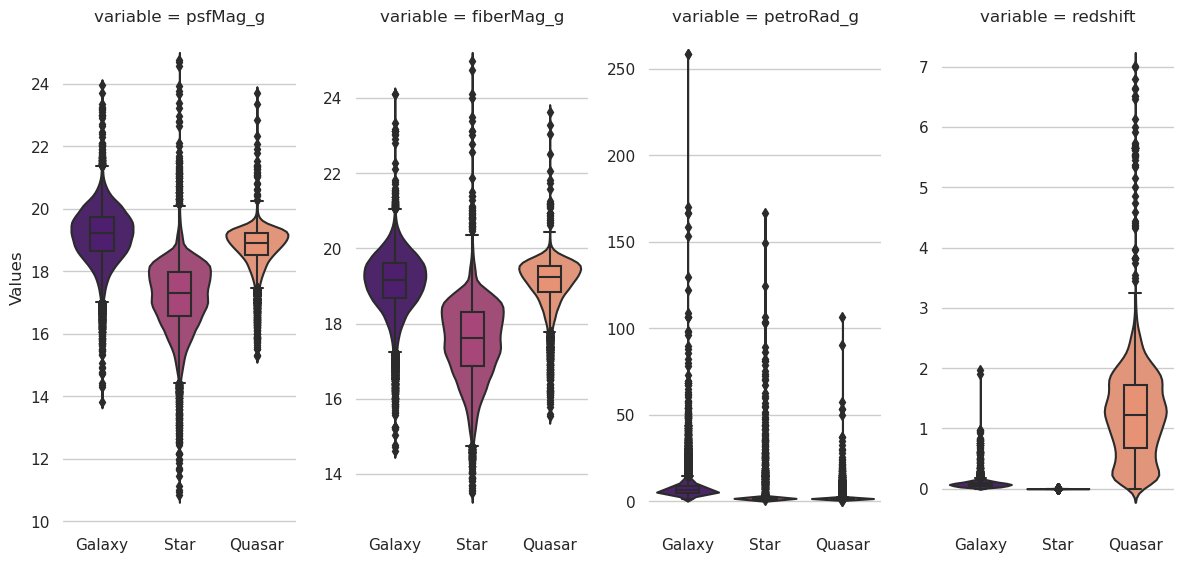

In [367]:
# Identify features with large difference between classes
data = df_del[["class", "psfMag_g", "fiberMag_g", "petroRad_g", "redshift"]].reset_index()
data = pd.melt(data, id_vars=["index", "class"])
data = data.replace({"class": {"GALAXY": "Galaxy", "STAR": "Star", "QSO": "Quasar"}})

# Plot data
ax = sns.FacetGrid(data, col="variable", height=6, aspect=.5, sharey=False)
ax.map(sns.violinplot, "class", "value", palette="magma", inner=None, scale='width', saturation=0.65)
ax.map(sns.boxplot, "class", "value", palette="magma", width = 0.3, boxprops={'zorder': 2})
ax.axes[0,0].set_ylabel('Values')
ax.axes[0,0].set_xlabel("")
ax.axes[0,1].set_xlabel("")
ax.axes[0,2].set_xlabel("")
ax.axes[0,3].set_xlabel("")
sns.set(font="CMU Serif", style="whitegrid")
sns.despine(left=True, bottom=True)

# Export plot
plt.savefig("box.png", dpi=800, bbox_inches="tight") 

### Class Imbalance

    index      class
0  Galaxy  53.116249
1    Star  36.306905
2  Quasar  10.576846


<AxesSubplot:ylabel='Percentage of Total Labels'>

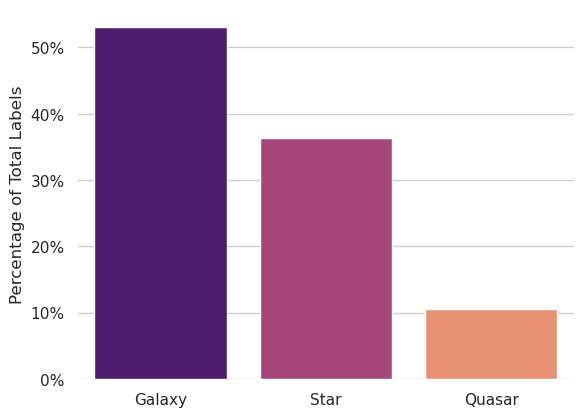

In [334]:
# Get composition of class after removing incomplete observations
data = df_del['class'].value_counts(normalize=True).to_frame().reset_index()
data["class"] = data["class"] * 100
data['index'] = ["Galaxy", "Star", "Quasar"]
print(data)

# Plot data
ax = sns.barplot(data=data, x="index", y="class", palette="magma")
ax.set(title = "",
       ylabel = "Percentage of Total Labels", xlabel = "")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
sns.set(font="CMU Serif", style="whitegrid")
sns.despine(left=True, bottom=True)
ax

# Export plot
# fig = ax.get_figure()
# fig.savefig("composition.png", dpi=1200, bbox_inches="tight") 

### 1.3 Outliers

In [201]:
# Get row ids containing feature values > ten standard deviations away from mean in each cluster (ignoring -9999)
cols_outlier = []
rows_outlier = set()
for cluster in ['GALAXY', 'STAR', 'QSO']:
    for i in X_train_del.columns.to_list():
        diff = abs(df_del[df_del['class']==cluster][i] - \
                   data_summary_del.loc[i][f"mean_{cluster}"]) / data_summary_del.loc[i][f"std_{cluster}"]
        diff_rows = diff[diff > 10].index.to_list()
        rows_outlier.update(diff_rows)
        if len(diff_rows) > 0:
            cols_outlier.append(i)
rows_outlier = list(rows_outlier)
      
len(rows_outlier)

1385

### 1.4 Multicollinearity

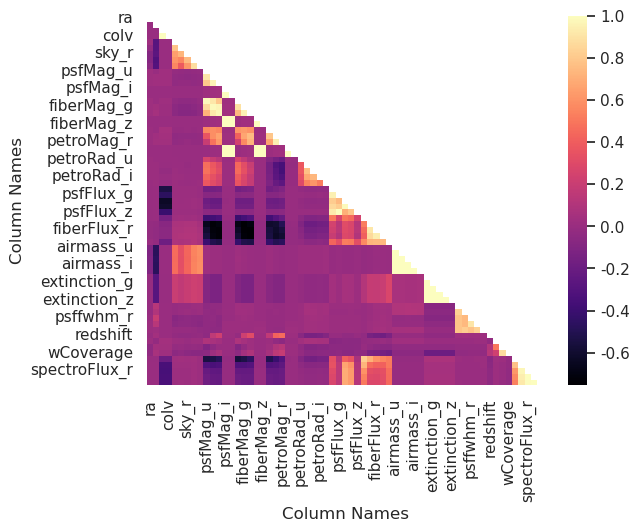

In [368]:
# Plot correlation matrix
mask = np.triu(np.ones_like(df.corr()))
ax = sns.heatmap(df.corr(), mask=mask, cmap="magma")
ax.set(title = "",
       ylabel = "Column Names", xlabel = "Column Names")
sns.set(font="CMU Serif", style="whitegrid")
sns.despine(left=True, bottom=True)
ax

# Export plot
fig = ax.get_figure()
fig.savefig("correlation.png", dpi=800, bbox_inches="tight") 

In [13]:
# Get list of top correlated columns
top_corr = df.corr().abs().unstack().sort_values(kind="quicksort", ascending=False)
top_corr = top_corr.to_frame(name="correlation").reset_index()
top_corr[top_corr["level_0"] != top_corr["level_1"]].head(30)

,level_0,level_1,correlation
63,extinction_z,extinction_u,1.000000
64,extinction_u,extinction_z,1.000000
65,extinction_i,extinction_g,1.000000
66,extinction_g,extinction_i,1.000000
67,extinction_z,extinction_g,1.000000
68,extinction_g,extinction_z,1.000000
69,extinction_g,extinction_u,1.000000
70,extinction_u,extinction_g,1.000000
71,extinction_r,extinction_z,1.000000
72,extinction_z,extinction_r,1.000000


# 2. Pre-Processing

In [14]:
warnings.filterwarnings("ignore")

# Import machine learning libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

### 2.1 Data Cleaning
We remove the data points with missing values here. We will in the end use them to "test" our algorithm for predicting with missing values.

In [15]:
# Transform labels to numerical values
def map_str_to_int(x):
    if x == "GALAXY":
        return 0
    elif x == "STAR":
        return 1
    else: # QSO -> 2
        return 2
    
y_train_int = pd.DataFrame()
y_train_int["class"] = y_train["class"].transform(map_str_to_int)

# Remove rows with missing data
X_train_clean = X_train.drop(rows_missing)
y_train_clean = y_train_int.drop(rows_missing)

# Remove rows with outlier and missing data
# X_train_clean = X_train.drop(list(set(rows_outlier)+set(rows_missing)))
# y_train_clean = y_train_int.drop(list(set(rows_outlier)+set(rows_missing)))

# Shuffle and split clean data into training and test sets
X_train_clean, X_valid_clean, y_train_clean, y_valid_clean = \
    train_test_split(X_train_clean, y_train_clean, test_size=0.1, random_state=42)

# Scale data
scaler = StandardScaler()
scaler.fit(X_train_clean)

X_train_clean = pd.DataFrame(scaler.transform(X_train_clean))
X_valid_clean = pd.DataFrame(scaler.transform(X_valid_clean))

X_train_clean.columns = X_train.columns
X_valid_clean.columns = X_train.columns

In [82]:
# Check class proportions are roughly the same
print('Training set class proportion:', 
      y_train_clean.value_counts(normalize=True).to_frame().reset_index(), sep='\n')
print('Validation set class proportion:', 
      y_valid_clean.value_counts(normalize=True).to_frame().reset_index(), sep='\n')

Training set class proportion:
   class         0
0      0  0.531681
1      1  0.362277
2      2  0.106043
Validation set class proportion:
   class       0
0      0  0.5265
1      1  0.3702
2      2  0.1033


### 2.2 PCA Dimensionality Reduction
We don't use LDA since LDA behaves less well when the number of classes is small (in our case we can only get 2 reduced coordinates at most, which is clearly insufficient).

Non-linear dimensionality reduction tools such as tSNE or UMAP are stochastic and used more often for visualization (unsupervised). As PCA is simple to implement and directly reduces multi-collinearity, we will stick to PCA.

In [16]:
# Get principal components
K = 25
columns = ["PCA" + str(i + 1) for i in range(K)]
pca = PCA(n_components = K)
pca.fit(X_train_clean)

# Label principal components
V = pd.DataFrame(data = pca.components_.T,
                 columns = columns,
                 index = X_train_clean.columns)
# print('Principal components:\n', V) 

# Calculate eigenvalues of the projections
lam = pca.explained_variance_
print('\n Eigenvalues/variance of the projections:\n', lam)


 Eigenvalues/variance of the projections:
 [16.97308945  7.41494635  6.31704801  5.25329271  4.85779323  4.06706415
  2.08772474  1.82401794  1.64154438  1.07560255  1.01703457  0.99871967
  0.98936485  0.95932302  0.79511048  0.77670557  0.68624319  0.65437211
  0.60896643  0.51510281  0.42031708  0.33804706  0.33328538  0.30529086
  0.30352022]


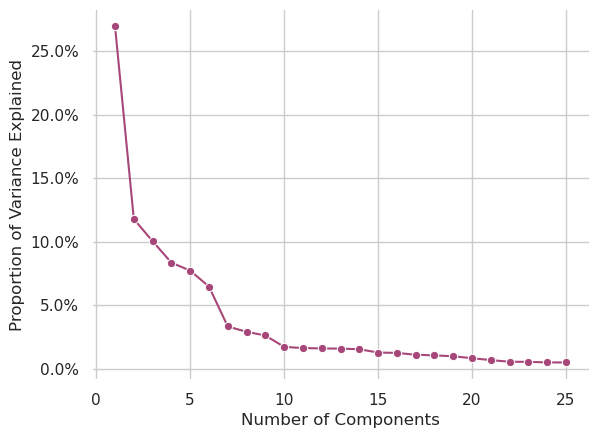

In [17]:
# Create scree plot to determine the optimal number of principal components
ax = sns.lineplot(y=pca.explained_variance_ratio_*100, x=range(1, 26), marker='o', color="#a74779")
ax.set(title = "",
       ylabel = "Proportion of Variance Explained", 
       xlabel = "Number of Components")
sns.set(font = "CMU Serif", style="whitegrid")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
sns.despine(left=True, bottom=True)
ax

# Export plot
fig = ax.get_figure()
fig.savefig("scree.png", dpi=1200, bbox_inches="tight") 

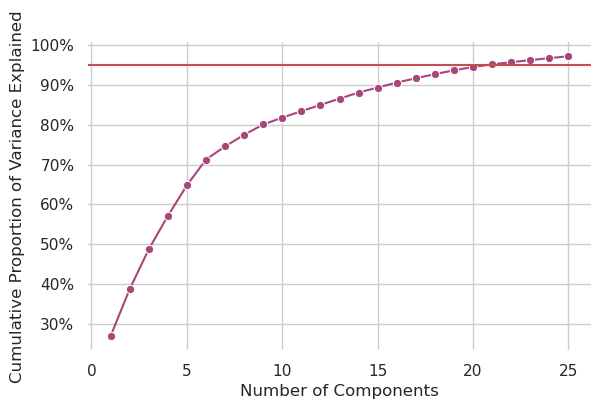

In [374]:
var_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize = (6.5, 4))
ax = sns.lineplot(y=var_ratio*100, x=range(1, 26), marker='o', color="#a74779")
ax.set(title = "",
       ylabel = "Cumulative Proportion of Variance Explained", 
       xlabel = "Number of Components")
ax.axhline(y = 95, color = 'r', linestyle = '-')
sns.set(font = "CMU Serif", style="whitegrid")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
sns.despine(left=True, bottom=True)
ax

# Export plot
fig = ax.get_figure()
fig.savefig("cum_var.png", dpi=1200, bbox_inches="tight") 

In [19]:
# Compute the projections onto the principal components. Adhering to the 95% rule, K=21.
Z_train_pca = pca.transform(X_train_clean)[:, :21]
Z_valid_pca = pca.transform(X_valid_clean)[:, :21]
X_train_clean_pca = pd.DataFrame(Z_train_pca, columns=columns[:21])
X_valid_clean_pca = pd.DataFrame(Z_valid_pca, columns=columns[:21])

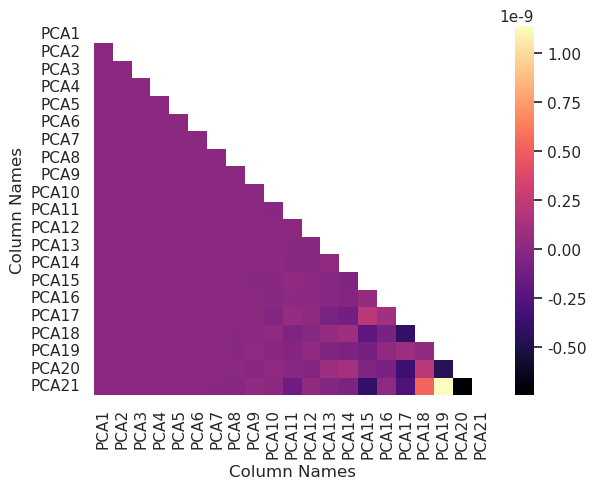

In [375]:
# Plot new correlation matrix
mask = np.triu(np.ones_like(X_train_clean_pca.corr()))
ax = sns.heatmap(X_train_clean_pca.corr(), mask=mask, cmap="magma")
ax.set(title = "",
       ylabel = "Column Names", xlabel = "Column Names")
sns.set(font="CMU Serif", style="whitegrid")
sns.despine(left=True, bottom=True)
ax

# Export plot
fig = ax.get_figure()
fig.savefig("correlation.png", dpi=800, bbox_inches="tight") 

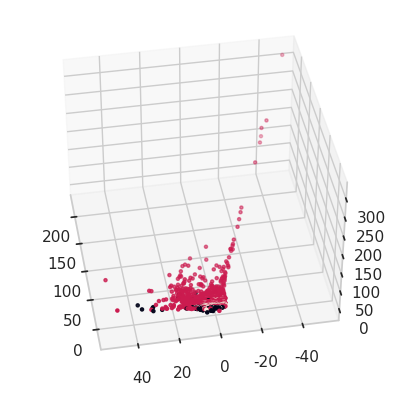

In [20]:
# Visualize PCA in 3D
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(Z_train_pca[:, 0], Z_train_pca[:, 1], Z_train_pca[:, 2], c=y_train_clean.iloc[:,0], marker=".")
ax.elev = 40
ax.azim = 170
ax.dist = 10

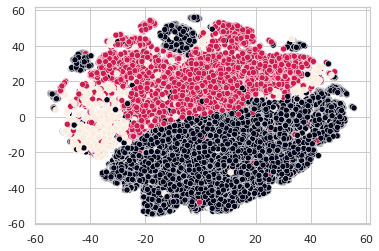

In [195]:
# Visualize PCA in 2D via tSNE (NB: This takes 30 min to run)
# from sklearn.manifold import TSNE
# tsne_2d = TSNE(n_components=2, random_state=0)
# projections_2d = tsne_2d.fit_transform(X_train_clean_pca.iloc[:,:12])
# sns.scatterplot(x=projections_2d[:,0], y=projections_2d[:,1], c=y_train_clean.iloc[:,0])

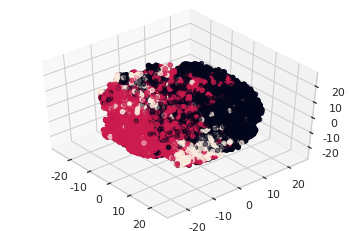

In [240]:
# Visualize PCA in 3D via tSNE (NB: This takes 80 min to run)
# from sklearn.manifold import TSNE
# tsne_3d = TSNE(n_components=3, random_state=0)
# projections_3d = tsne_3d.fit_transform(X_train_clean_pca.iloc[:,:12])
# ax = plt.axes(projection='3d')
# ax.scatter3D(projections_3d[:,0], projections_3d[:,1], projections_3d[:,2], c=y_train_clean.iloc[:,0])
# ax.elev = 45
# ax.azim = -40
# ax.dist = 10

# 3. Model Fitting

In [300]:
warnings.filterwarnings("ignore")

# Import necessary modules and functions
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.calibration import CalibratedClassifierCV
from sklearn.utils import resample

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
# Construct sample weight to handle class imbalance in some models
from sklearn.utils.class_weight import compute_class_weight
class_weight = compute_class_weight('balanced', classes=[0,1,2], y=y_train_clean.iloc[:,0])
sample_weight = [class_weight[i] for i in y_train_clean.iloc[:,0]]

We will perform model selection and hyperparameter search using 5-fold CV over the split training set. Then decide the best model to use based on the CV score. Finally estimate the generalization risk of the selected model using the split validation set.

Note: *Accuracy* = 1 - *error rate* = 1 - *generalization risk under 0-1 loss*.

(**PS: In the following sections, the hyperparameter range is typically searched in batches separately for different combinations due to the limited computing power. It might look that GridSearchCV is applied to only a few combinations, but actually many other combinations are tested separately beforehand so as to reduce our target to those final combinations.**)

## 3.1 Naive Bayes

(<1 sec)

In [30]:
%%time

nb_model = GaussianNB()

# Hyper-parameter search (5-fold CV by default)
param_grid = {}
grid_nb = GridSearchCV(nb_model, param_grid, scoring='accuracy')
grid_nb.fit(X_train_clean_pca, y_train_clean)

CPU times: user 276 ms, sys: 68.1 ms, total: 344 ms
Wall time: 342 ms


GridSearchCV(estimator=GaussianNB(), param_grid={}, scoring='accuracy')

### Accuracy (Naive Bayes)

In [31]:
# Fit the best model
nb_model_final = grid_nb.best_estimator_
print("The best averaged cross-validated score is:", grid_nb.best_score_)

# The estimated generalization accuracy
pred_nb = nb_model_final.predict(X_valid_clean_pca)
acc_nb = accuracy_score(y_valid_clean, pred_nb)
print(f'Accuracy on validation set: {acc_nb}')

The best averaged cross-validated score is: 0.9030913355738838
Accuracy on validation set: 0.9079


### Quality Metrics and Confusion Matrix (Naive Bayes)

              precision    recall  f1-score   support

           0     0.8918    0.9660    0.9274      5265
           1     0.9332    0.8379    0.8830      3702
           2     0.9157    0.8625    0.8883      1033

    accuracy                         0.9079     10000
   macro avg     0.9136    0.8888    0.8996     10000
weighted avg     0.9096    0.9079    0.9069     10000



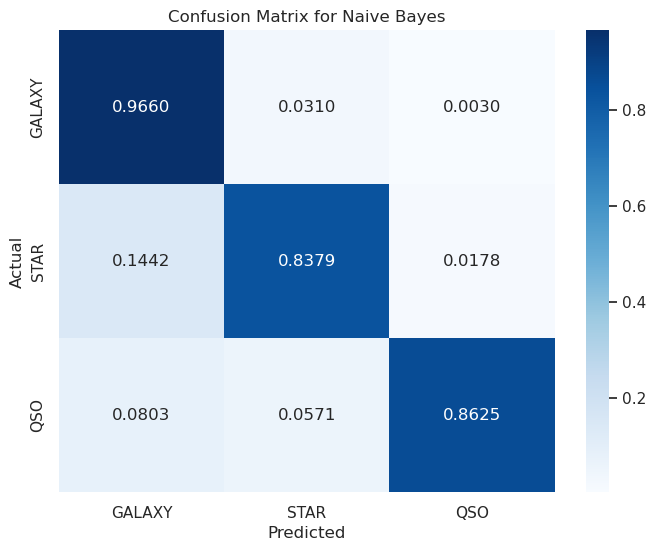

In [179]:
# Quality metrics
print(classification_report(y_valid_clean, pred_nb, digits=4))

# Confusion matrix
cm = confusion_matrix(y_valid_clean, pred_nb, labels=[0,1,2], normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot = True,  fmt = '.4f', xticklabels = ['GALAXY', 'STAR', 'QSO'], 
            yticklabels = ['GALAXY', 'STAR', 'QSO'], cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Naive Bayes')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## 3.2 K Nearest Neighbors

(13.5 min)

Difficult to add weighting for class imbalance.

In [22]:
%%time

knn_model = KNeighborsClassifier()

# Hyper-parameter search (5-fold CV by default)
param_grid = {'n_neighbors': np.arange(1, 9, 1)}
grid_knn = GridSearchCV(knn_model, param_grid, scoring='accuracy', verbose=0)
grid_knn.fit(X_train_clean_pca, y_train_clean)

CPU times: user 19min 31s, sys: 6min 6s, total: 25min 38s
Wall time: 13min 27s


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8])},
             scoring='accuracy')

### Accuracy (KNN)

In [23]:
# Fit the best model
knn_model_final = grid_knn.best_estimator_
print("The best parameters are:", grid_knn.best_params_)
print("The best averaged cross-validated score is:", grid_knn.best_score_)

# The estimated generalization accuracy
pred_knn = knn_model_final.predict(X_valid_clean_pca)
acc_knn = accuracy_score(y_valid_clean, pred_knn)
print(f'Accuracy on validation set: {acc_knn}')

The best parameters are: {'n_neighbors': 3}
The best averaged cross-validated score is: 0.9742310436046067
Accuracy on validation set: 0.977


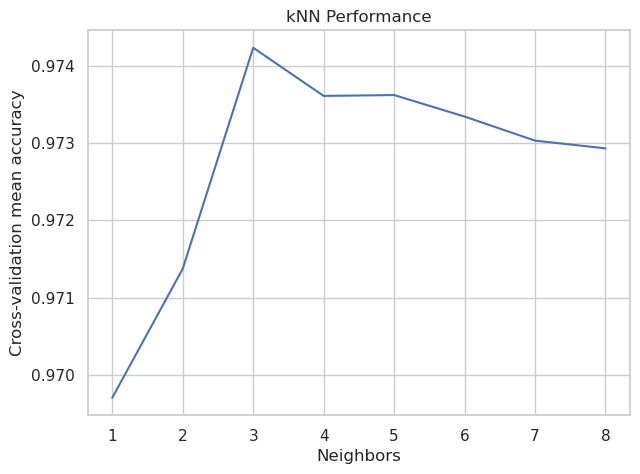

In [24]:
plt.figure(figsize=(7, 5))
plt.plot(np.arange(1, 9, 1), grid_knn.cv_results_['mean_test_score'])
plt.title('kNN Performance')
plt.xlabel('Neighbors')
plt.xticks(np.arange(1, 9, 1))
plt.ylabel('Cross-validation mean accuracy');

### Quality Metrics and Confusion Matrix (KNN)

              precision    recall  f1-score   support

           0     0.9793    0.9892    0.9842      5265
           1     0.9744    0.9873    0.9808      3702
           2     0.9742    0.8780    0.9236      1033

    accuracy                         0.9770     10000
   macro avg     0.9760    0.9515    0.9629     10000
weighted avg     0.9770    0.9770    0.9767     10000



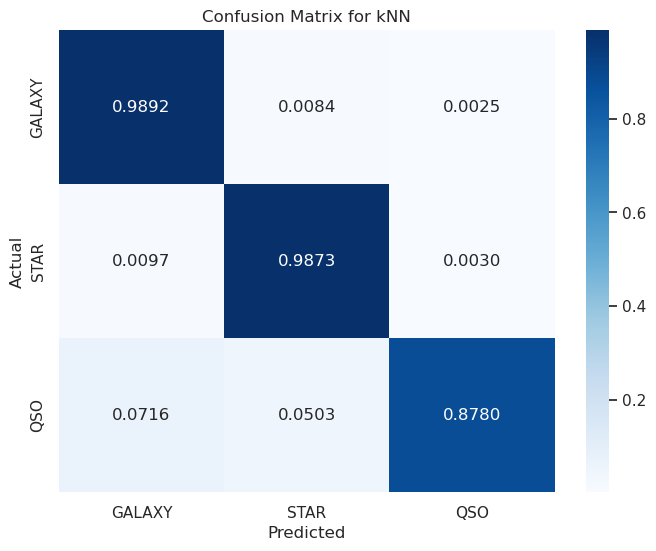

In [180]:
# Quality metrics
print(classification_report(y_valid_clean, pred_knn, digits=4))

# Confusion matrix
cm = confusion_matrix(y_valid_clean, pred_knn, labels=[0,1,2], normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot = True,  fmt = '.4f', xticklabels = ['GALAXY', 'STAR', 'QSO'], 
            yticklabels = ['GALAXY', 'STAR', 'QSO'], cmap=plt.cm.Blues)
plt.title('Confusion Matrix for kNN')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## 3.3 Random Forests

(46 min)

Measure of node impurity: gini similar to entropy (both CV scores are roughly 0.9854)

Max features to consider during random greedy split: sqrt by default

n_estimator around 30-100

'balanced_subsample' uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)) (weights are computed based on the bootstrap sample for every tree grown).


In [44]:
%%time

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced_subsample', criterion='entropy')

# Hyper-parameter search (5-fold CV by default)
param_grid = {'n_estimators': np.arange(45, 76, 10), 'max_depth': np.arange(15, 34, 3)}
grid_rf = GridSearchCV(rf_model, param_grid, scoring='accuracy', verbose=0)
grid_rf.fit(X_train_clean_pca, y_train_clean)

CPU times: user 45min 45s, sys: 6.42 s, total: 45min 51s
Wall time: 45min 59s


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                              criterion='entropy',
                                              random_state=42),
             param_grid={'max_depth': array([15, 18, 21, 24, 27, 30, 33]),
                         'n_estimators': array([45, 55, 65, 75])},
             scoring='accuracy')

### Accuracy (Random Forest)

In [45]:
# Fit the best model
rf_model_final = grid_rf.best_estimator_
print("The best parameters are:", grid_rf.best_params_)
print("The best averaged cross-validated score is:", grid_rf.best_score_)

# The estimated generalization accuracy
pred_rf = rf_model_final.predict(X_valid_clean_pca)
acc_rf = accuracy_score(y_valid_clean, pred_rf)
print(f'Accuracy on validation set: {acc_rf}')

The best parameters are: {'max_depth': 15, 'n_estimators': 75}
The best averaged cross-validated score is: 0.98540982394961
Accuracy on validation set: 0.9857


### Quality Metrics and Confusion Matrix  (Random Forest)

              precision    recall  f1-score   support

           0     0.9840    0.9934    0.9887      5265
           1     0.9887    0.9935    0.9911      3702
           2     0.9834    0.9187    0.9499      1033

    accuracy                         0.9857     10000
   macro avg     0.9854    0.9685    0.9766     10000
weighted avg     0.9857    0.9857    0.9856     10000



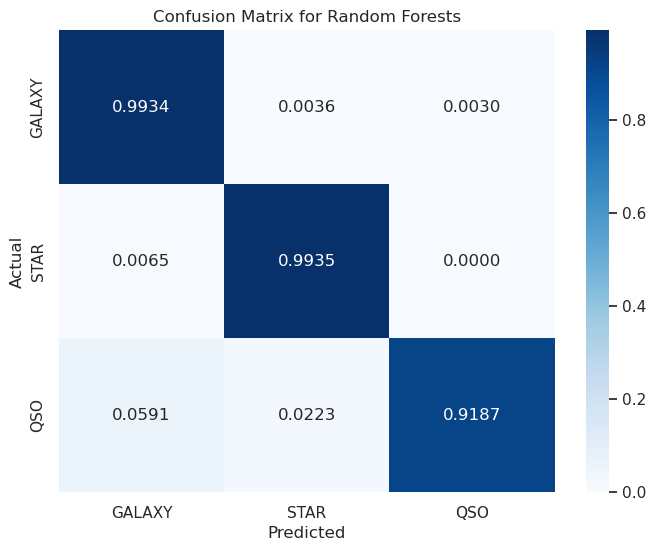

In [181]:
# Quality metrics
print(classification_report(y_valid_clean, pred_rf, digits=4))

# Confusion matrix
cm = confusion_matrix(y_valid_clean, pred_rf, labels=[0,1,2], normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot = True,  fmt = '.4f', xticklabels = ['GALAXY', 'STAR', 'QSO'], 
            yticklabels = ['GALAXY', 'STAR', 'QSO'], cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forests')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Feature Importance  (Random Forest)
This only has limited implications since PCA makes each transformed feature lose its original physical meaning. However, by observing the PCA index in the x-axis, we see that some of the dimensions that have lower variances demonstrate greater importance in classification. This implies that, even after standardization, it is not necessarily the case that dimensions with greater variance are more important in identifying celestial bodies; this makes sense since features like fiberFlux have extremely large and divergent values, but they don't provide extra useful information.

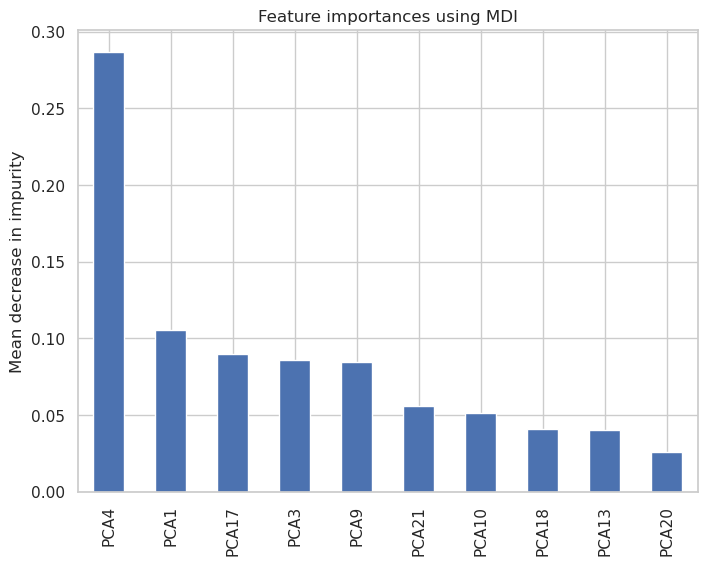

In [376]:
# Compute feature importance
importances = rf_model_final.feature_importances_
feature_names = X_train_clean_pca.columns
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot top-10 feature importances
plt.figure(figsize=(8, 6))
forest_importances[:10].plot.bar()
plt.title("Feature importances using MDI")
plt.ylabel("Mean decrease in impurity")
plt.show();

## 3.4 Extremely Randomized Trees /  Extra Trees

(14 min)

In [47]:
%%time

et_model = ExtraTreesClassifier(random_state=42, class_weight='balanced', criterion='entropy')

# Hyper-parameter search (5-fold CV by default)
param_grid = {'n_estimators': np.arange(65, 111, 15), 'max_depth': np.arange(18, 40, 3)}
grid_et = GridSearchCV(et_model, param_grid, scoring='accuracy', verbose=0)
grid_et.fit(X_train_clean_pca, y_train_clean)

CPU times: user 13min 28s, sys: 15.3 s, total: 13min 43s
Wall time: 13min 47s


GridSearchCV(estimator=ExtraTreesClassifier(class_weight='balanced',
                                            criterion='entropy',
                                            random_state=42),
             param_grid={'max_depth': array([18, 21, 24, 27, 30, 33, 36, 39]),
                         'n_estimators': array([ 65,  80,  95, 110])},
             scoring='accuracy')

### Accuracy (Extra Trees)

In [48]:
# Fit the best model
et_model_final = grid_et.best_estimator_
print("The best parameters are:", grid_et.best_params_)
print("The best averaged cross-validated score is:", grid_et.best_score_)

# The estimated generalization accuracy
pred_et = et_model_final.predict(X_valid_clean_pca)
acc_et = accuracy_score(y_valid_clean, pred_et)
print(f'Accuracy on validation set: {acc_et}')

The best parameters are: {'max_depth': 39, 'n_estimators': 110}
The best averaged cross-validated score is: 0.9842430436909666
Accuracy on validation set: 0.9855


### Quality Metrics and Confusion Matrix  (Extra Trees)

              precision    recall  f1-score   support

           0     0.9820    0.9949    0.9884      5265
           1     0.9890    0.9935    0.9912      3702
           2     0.9916    0.9090    0.9485      1033

    accuracy                         0.9855     10000
   macro avg     0.9875    0.9658    0.9760     10000
weighted avg     0.9856    0.9855    0.9853     10000



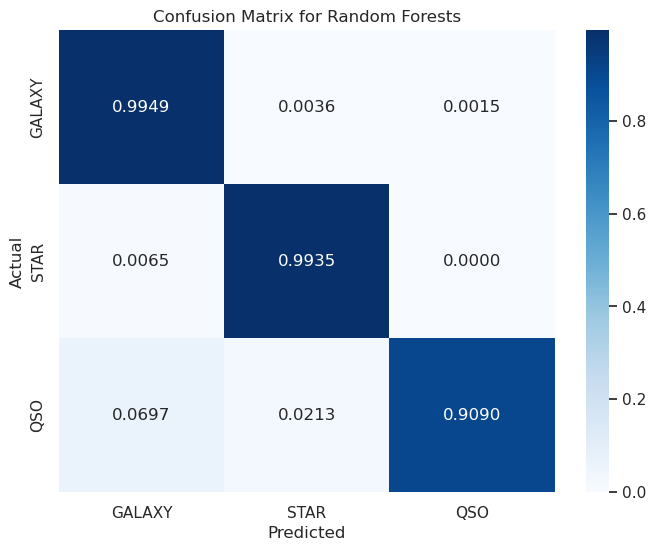

In [182]:
# Quality metrics
print(classification_report(y_valid_clean, pred_et, digits=4))

# Confusion matrix
cm = confusion_matrix(y_valid_clean, pred_et, labels=[0,1,2], normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot = True,  fmt = '.4f', xticklabels = ['GALAXY', 'STAR', 'QSO'], 
            yticklabels = ['GALAXY', 'STAR', 'QSO'], cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forests')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## 3.5 SVM

(23 min)

By default use RBF kernel

In [33]:
%%time

svc_model = SVC(random_state=42, class_weight="balanced")

# Hyper-parameter search (5-fold CV by default)
param_grid = {'C': np.logspace(-1, 1, 5)}
grid_svc = GridSearchCV(svc_model, param_grid, scoring='accuracy', verbose=0)
grid_svc.fit(X_train_clean_pca, y_train_clean)

CPU times: user 22min 57s, sys: 12.6 s, total: 23min 9s
Wall time: 23min 10s


GridSearchCV(estimator=SVC(class_weight='balanced', random_state=42),
             param_grid={'C': array([ 0.1       ,  0.31622777,  1.        ,  3.16227766, 10.        ])},
             scoring='accuracy')

### Accuracy (SVM)

In [34]:
# Fit the best model
svc_model_final = grid_svc.best_estimator_
print("The best parameters are:", grid_svc.best_params_)
print("The best averaged cross-validated score is:", grid_svc.best_score_)

# The estimated generalization accuracy
pred_svc = svc_model_final.predict(X_valid_clean_pca)
acc_svc = accuracy_score(y_valid_clean, pred_svc)
print(f'Accuracy on validation set: {acc_svc}')

The best parameters are: {'C': 10.0}
The best averaged cross-validated score is: 0.9891545962033511
Accuracy on validation set: 0.9893


### Quality Metrics and Confusion Matrix (SVM)

              precision    recall  f1-score   support

           0     0.9899    0.9913    0.9906      5265
           1     0.9957    0.9943    0.9950      3702
           2     0.9631    0.9613    0.9622      1033

    accuracy                         0.9893     10000
   macro avg     0.9829    0.9823    0.9826     10000
weighted avg     0.9893    0.9893    0.9893     10000



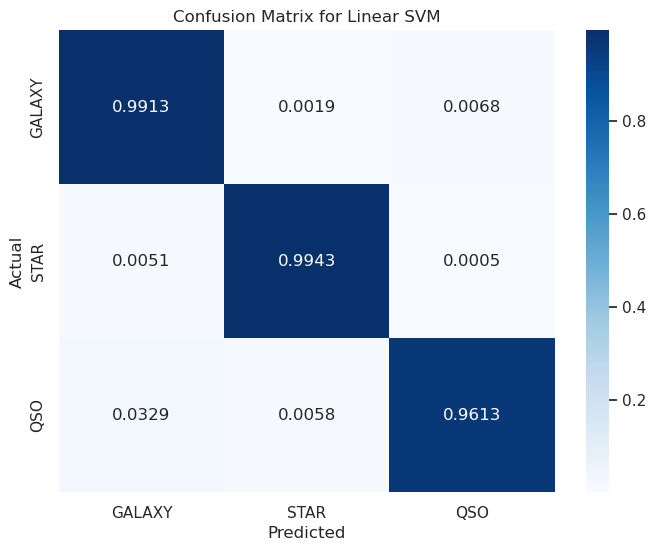

In [183]:
# Quality metrics
print(classification_report(y_valid_clean, pred_svc, digits=4))

# Confusion matrix
cm = confusion_matrix(y_valid_clean, pred_svc, labels=[0,1,2], normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot = True,  fmt = '.4f', xticklabels = ['GALAXY', 'STAR', 'QSO'], 
            yticklabels = ['GALAXY', 'STAR', 'QSO'], cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Linear SVM')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## 3.6 AdaBoost

(35 min)

Learning_rate between 0.01 to 1 and n_estimators between 100 and 1500.

Inferior to XGBoost.

In [133]:
%%time

ada_model = AdaBoostClassifier(learning_rate=0.1, random_state=42)

# Hyper-parameter search (5-fold CV by default)
param_grid = {'n_estimators': [1000, 1100]}
grid_ada = GridSearchCV(ada_model, param_grid, scoring='accuracy', verbose=0)
grid_ada.fit(X_train_clean_pca, y_train_clean, sample_weight = sample_weight)

CPU times: user 35min 3s, sys: 2.21 s, total: 35min 5s
Wall time: 35min 5s


GridSearchCV(estimator=AdaBoostClassifier(learning_rate=0.1, random_state=42),
             param_grid={'n_estimators': [1000, 1100]}, scoring='accuracy')

### Accuracy (AdaBoost)

In [134]:
# Fit the best model
ada_model_final = grid_ada.best_estimator_
print("The best parameters are: ", grid_ada.best_params_)
print("The best averaged cross-validated score is:", grid_ada.best_score_)

# The estimated generalization accuracy
pred_ada = ada_model_final.predict(X_valid_clean_pca)
acc_ada = accuracy_score(y_valid_clean, pred_ada)
print(f'Accuracy on validation set: {acc_ada}')

The best parameters are:  {'n_estimators': 1100}
The best averaged cross-validated score is: 0.978953692411984
Accuracy on validation set: 0.9794


### Quality Metrics and Confusion Matrix (AdaBoost)

              precision    recall  f1-score   support

           0     0.9853    0.9783    0.9818      5265
           1     0.9805    0.9911    0.9858      3702
           2     0.9456    0.9429    0.9443      1033

    accuracy                         0.9794     10000
   macro avg     0.9705    0.9708    0.9706     10000
weighted avg     0.9794    0.9794    0.9794     10000



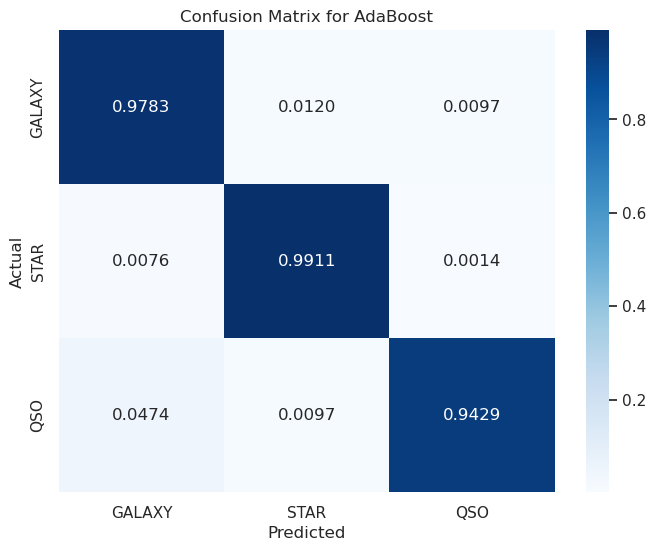

In [184]:
# Quality metrics
print(classification_report(y_valid_clean, pred_ada, digits=4))

# Confusion matrix
cm = confusion_matrix(y_valid_clean, pred_ada, labels=[0,1,2], normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot = True,  fmt = '.4f', xticklabels = ['GALAXY', 'STAR', 'QSO'], 
            yticklabels = ['GALAXY', 'STAR', 'QSO'], cmap=plt.cm.Blues)
plt.title('Confusion Matrix for AdaBoost')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## 3.7 XGBoost

(1 h 5 min)

learning rate between 0.01 to 1 (often 0.05 to 0.3)

subsample, colsampe_bytree between 0.5 to 1

max_depth between 3 to 10 (often around 5)

n_estimators between 100 to 1500

In [130]:
%%time

xgb_model = XGBClassifier(learning_rate=0.1, subsample=0.85, colsample_bytree=0.85, nthread=4)

# Hyper-parameter search (5-fold CV by default)
param_grid = {'n_estimators': [800, 1000], 'max_depth': [6, 8]}
grid_xgb = GridSearchCV(xgb_model, param_grid, scoring='accuracy', verbose=0)
grid_xgb.fit(X_train_clean_pca, y_train_clean, sample_weight=sample_weight)

[21:04:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:07:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:09:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:12:10] WARNING: /Users/runner/miniforge3/c

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.85,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
  

### Accuracy (XGBoost)

In [131]:
# Fit the best model
xgb_model_final = grid_xgb.best_estimator_
print("The best parameters are: ", grid_xgb.best_params_)
print("The best averaged cross-validated score is:", grid_xgb.best_score_)

# The estimated generalization accuracy
pred_xgb = xgb_model_final.predict(X_valid_clean_pca)
acc_xgb = accuracy_score(y_valid_clean, pred_xgb)
print(f'Accuracy on validation set: {acc_xgb}')

The best parameters are:  {'max_depth': 6, 'n_estimators': 1000}
The best averaged cross-validated score is: 0.989988003617961
Accuracy on validation set: 0.9901


### Quality Metrics and Confusion Matrix (XGBoost)

              precision    recall  f1-score   support

           0     0.9872    0.9951    0.9911      5265
           1     0.9965    0.9949    0.9957      3702
           2     0.9819    0.9477    0.9645      1033

    accuracy                         0.9901     10000
   macro avg     0.9885    0.9792    0.9838     10000
weighted avg     0.9901    0.9901    0.9901     10000



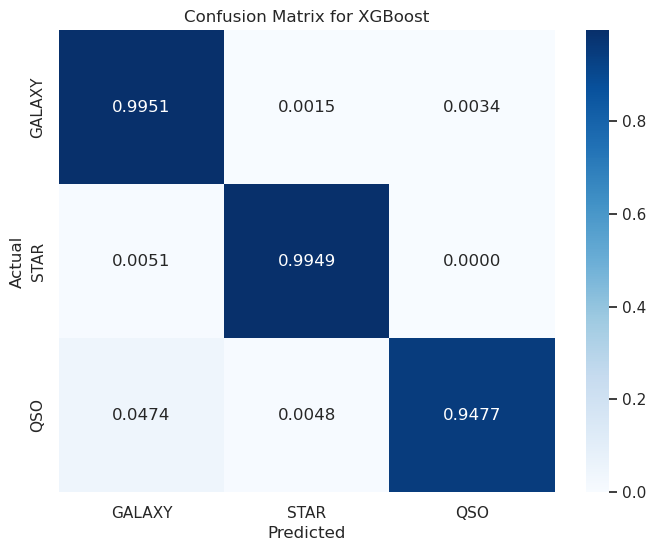

In [185]:
# Quality metrics
print(classification_report(y_valid_clean, pred_xgb, digits=4))

# Confusion matrix
cm = confusion_matrix(y_valid_clean, pred_xgb, labels=[0, 1, 2], normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot = True,  fmt = '.4f', xticklabels = ['GALAXY', 'STAR', 'QSO'], 
            yticklabels = ['GALAXY', 'STAR', 'QSO'], cmap=plt.cm.Blues)
plt.title('Confusion Matrix for XGBoost')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## 3.8 LightGBM

Default min_split_gain=0, min_child_weight=0.001 are the best, min_child_samples=20

Best values for others (roughly): learning_rate=0.1, subsample=0.85, colsample_bytree=0.85, max_depth=8, num_leaves=48, n_estimators=1100

In [126]:
%%time

lgbm_model = LGBMClassifier(learning_rate=0.1, n_estimators=1100, 
                            subsample=0.85, colsample_bytree=0.85,
                            max_depth=8, class_weight='balanced', random_state=42, n_jobs=4)

# Hyper-parameter search (5-fold CV by default)
param_grid = {'n_estimators': [1050, 1100, 1150], 'num_leaves': [50, 56, 62]}
grid_lgbm = GridSearchCV(lgbm_model, param_grid, scoring='accuracy', verbose=0)
grid_lgbm.fit(X_train_clean_pca, y_train_clean)

CPU times: user 32min 48s, sys: 7.57 s, total: 32min 56s
Wall time: 8min 15s


GridSearchCV(estimator=LGBMClassifier(class_weight='balanced',
                                      colsample_bytree=0.85, max_depth=8,
                                      n_estimators=1100, n_jobs=4,
                                      random_state=42, subsample=0.85),
             param_grid={'n_estimators': [1050, 1100, 1150],
                         'num_leaves': [50, 56, 62]},
             scoring='accuracy')

### Accuracy (LightGBM)

In [128]:
# Fit the best model
lgbm_model_final = grid_lgbm.best_estimator_
print("The best parameters are: ", grid_lgbm.best_params_)
print("The best averaged cross-validated score is:", grid_lgbm.best_score_)

# The estimated generalization accuracy
pred_lgbm = lgbm_model_final.predict(X_valid_clean_pca)
acc_lgbm = accuracy_score(y_valid_clean, pred_lgbm)
print(f'Accuracy on validation set: {acc_lgbm}')

The best parameters are:  {'n_estimators': 1100, 'num_leaves': 56}
The best averaged cross-validated score is: 0.9901658017684071
Accuracy on validation set: 0.9903


### Quality Metrics and Confusion Matrix (LightGBM)

              precision    recall  f1-score   support

           0     0.9868    0.9958    0.9913      5265
           1     0.9970    0.9949    0.9959      3702
           2     0.9839    0.9458    0.9645      1033

    accuracy                         0.9903     10000
   macro avg     0.9892    0.9788    0.9839     10000
weighted avg     0.9903    0.9903    0.9902     10000



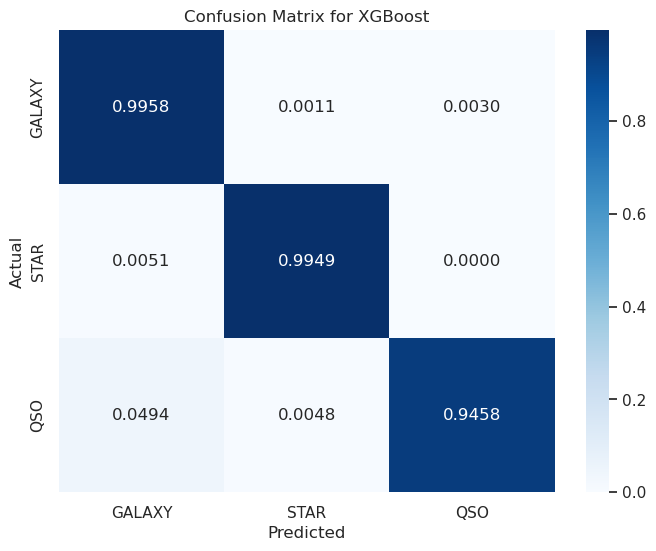

In [186]:
# Quality metrics
print(classification_report(y_valid_clean, pred_lgbm, digits=4))

# Confusion matrix
cm = confusion_matrix(y_valid_clean, pred_lgbm, labels=[0, 1, 2], normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot = True,  fmt = '.4f', xticklabels = ['GALAXY', 'STAR', 'QSO'], 
            yticklabels = ['GALAXY', 'STAR', 'QSO'], cmap=plt.cm.Blues)
plt.title('Confusion Matrix for XGBoost')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## 3.9 Deep Neural Network

(12.5 min)

Some heuristics for choosing the parameters:

Activation: ReLU vs LeakyReLU (tanh, sigmoid don't work well)

Batch size: 32-512

Layer depth & width: less than twice the input size; control # of parameters, if exceeds the number of data or overfits on validation set, consider dropouts

Dropout rate: 0.2-0.5; dropout is necessary in our case, as otherwise the validation loss will appear rugged and fail to decrease below certain threshold.

(**These parameters have been carefully manually tuned beforehand. Below we directly implement the model with optimal parameters found.**)

In [52]:
# Estimate risk using CV
CV_history = []

# Ensure reproducibility
tf.random.set_seed(42)

# Build an MLP with dropouts
def create_model():
    activation = tf.nn.relu
    model = Sequential([
        Dense(40, activation = activation),
        Dropout(0.5),
        Dense(20, activation = activation),
        Dense(10, activation = activation),
        Dense(10, activation = activation),
        Dense(3, activation = tf.nn.softmax)
    ])
    return model

# Convert data to array
full_data = X_train_clean_pca.values
full_label = np.array(y_train_clean).flatten()

# 5-fold CV; StratifiedKFold preserves class proportions, so that class_weight deals with class imbalance correctly
for (train, test) in StratifiedKFold().split(full_data, full_label):
    # End previous session and create a new model
    tf.keras.backend.clear_session()
    model = create_model()
    
    # Use categorical_crossentropy as loss and accuracy as score
    model.compile(optimizer = "adam",
                  loss = 'sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Incorporate class weights
    history = model.fit(full_data[train], full_label[train],
                        validation_data=(full_data[test], full_label[test]),
                        epochs=50, batch_size=64, class_weight=class_weight, verbose=0)
    
    CV_history.append(history)

2023-03-16 17:08:41.727701: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-16 17:08:41.728177: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 12. Tune using inter_op_parallelism_threads for best performance.


### Accuracy (Deep Neural Network)

The averaged cross-validated score is: 0.99085474


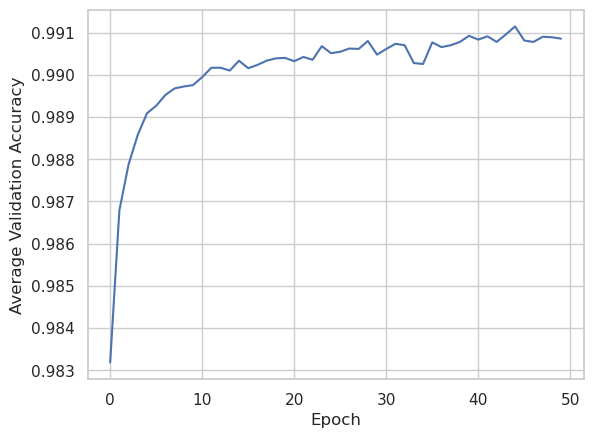

In [378]:
# Extract validation accuracies
mlp_cv_score = []
for h in CV_history:
    mlp_cv_score.append(h.history['val_accuracy'])

# Compute the average CV validation accuracy score
mlp_cv_score_mean = np.mean(mlp_cv_score, axis=0)
print("The averaged cross-validated score is:", mlp_cv_score_mean[-1])

# Plot the average CV validation accuracy score
plt.plot(mlp_cv_score_mean)
plt.ylabel('Average Validation Accuracy')
plt.xlabel('Epoch')
plt.show()

In [55]:
# Ensure reproducibility
tf.random.set_seed(42)

# Fit model on the full training set and estimate generalization accuracy using the validation set split earlier
mlp_model_final = create_model()
mlp_model_final.compile(optimizer = "adam",
                       loss = 'sparse_categorical_crossentropy',
                       metrics=['accuracy'])
history = mlp_model_final.fit(X_train_clean_pca.values, y_train_clean.values,
                    validation_data=(X_valid_clean_pca.values, y_valid_clean.values),
                    epochs=50, batch_size=64, class_weight=class_weight, verbose=0)

Accuracy on validation set: 0.9915


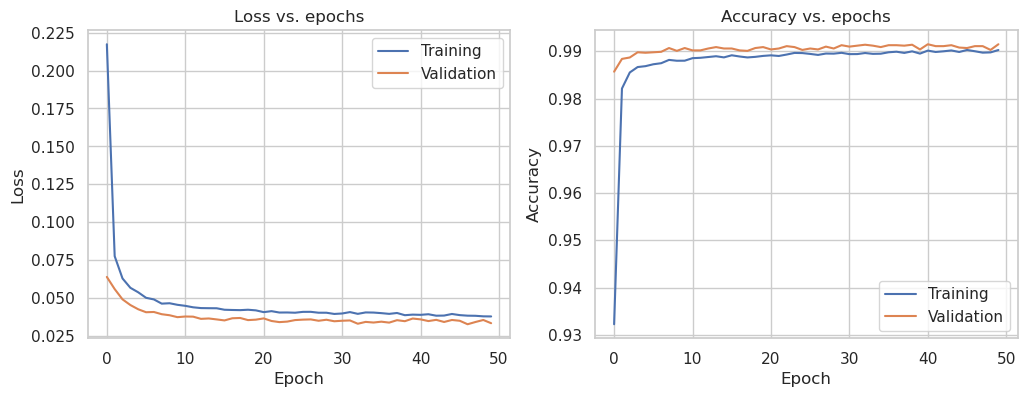

In [56]:
# Estimate generalization accuracy
print('Accuracy on validation set:', history.history['val_accuracy'][-1])


plt.figure(figsize=(12,4))

# Plot training and validation loss
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

# Plot training and validation accuracy
plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')

plt.show()

### Quality Metrics and Confusion Matrix (Deep Neural Network)

              precision    recall  f1-score   support

           0     0.9883    0.9960    0.9921      5265
           1     0.9981    0.9957    0.9969      3702
           2     0.9840    0.9535    0.9685      1033

    accuracy                         0.9915     10000
   macro avg     0.9901    0.9817    0.9859     10000
weighted avg     0.9915    0.9915    0.9915     10000



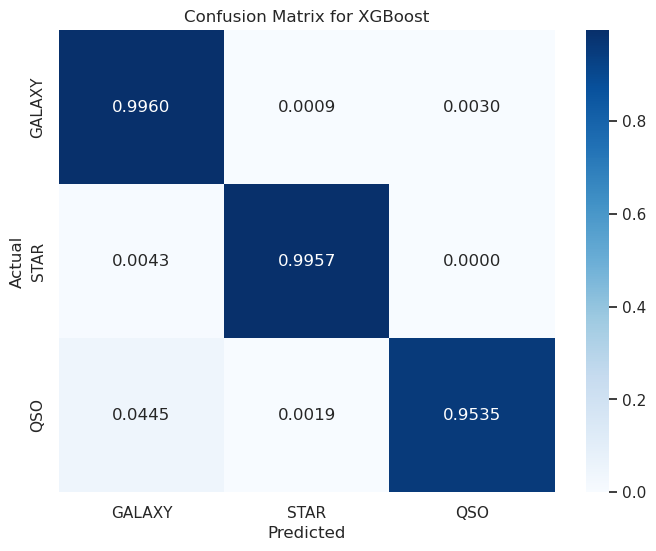

In [187]:
# Predict labels on the validation set
pred_mlp = tf.argmax(mlp_model_final.predict(X_valid_clean_pca.values), 1)

# Quality metrics
print(classification_report(y_valid_clean, pred_mlp, digits=4))

# Confusion matrix
cm = confusion_matrix(y_valid_clean, pred_mlp, labels=[0, 1, 2], normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot = True,  fmt = '.4f', xticklabels = ['GALAXY', 'STAR', 'QSO'], 
            yticklabels = ['GALAXY', 'STAR', 'QSO'], cmap=plt.cm.Blues)
plt.title('Confusion Matrix for XGBoost')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## 3.10 ROC Curves and AUC

(12.5 min)

In [162]:
def map_int_to_str(x):
    if x == 0:
        return "GALAXY"
    elif x == 1:
        return "STAR"
    else: 
        return "QSO"
    
# Binarize labels in order create ROC curves (one versus the rest) for each label
y_train_bin = label_binarize(y_train_clean, classes=[0,1,2])
y_valid_bin = label_binarize(y_valid_clean, classes=[0,1,2])

n_classes = 3
model_names = ['Naive Bayes', 'kNN', 'Random Forests', 'SVM', 'LightGBM']

CPU times: user 13min 36s, sys: 27.7 s, total: 14min 4s
Wall time: 12min 46s


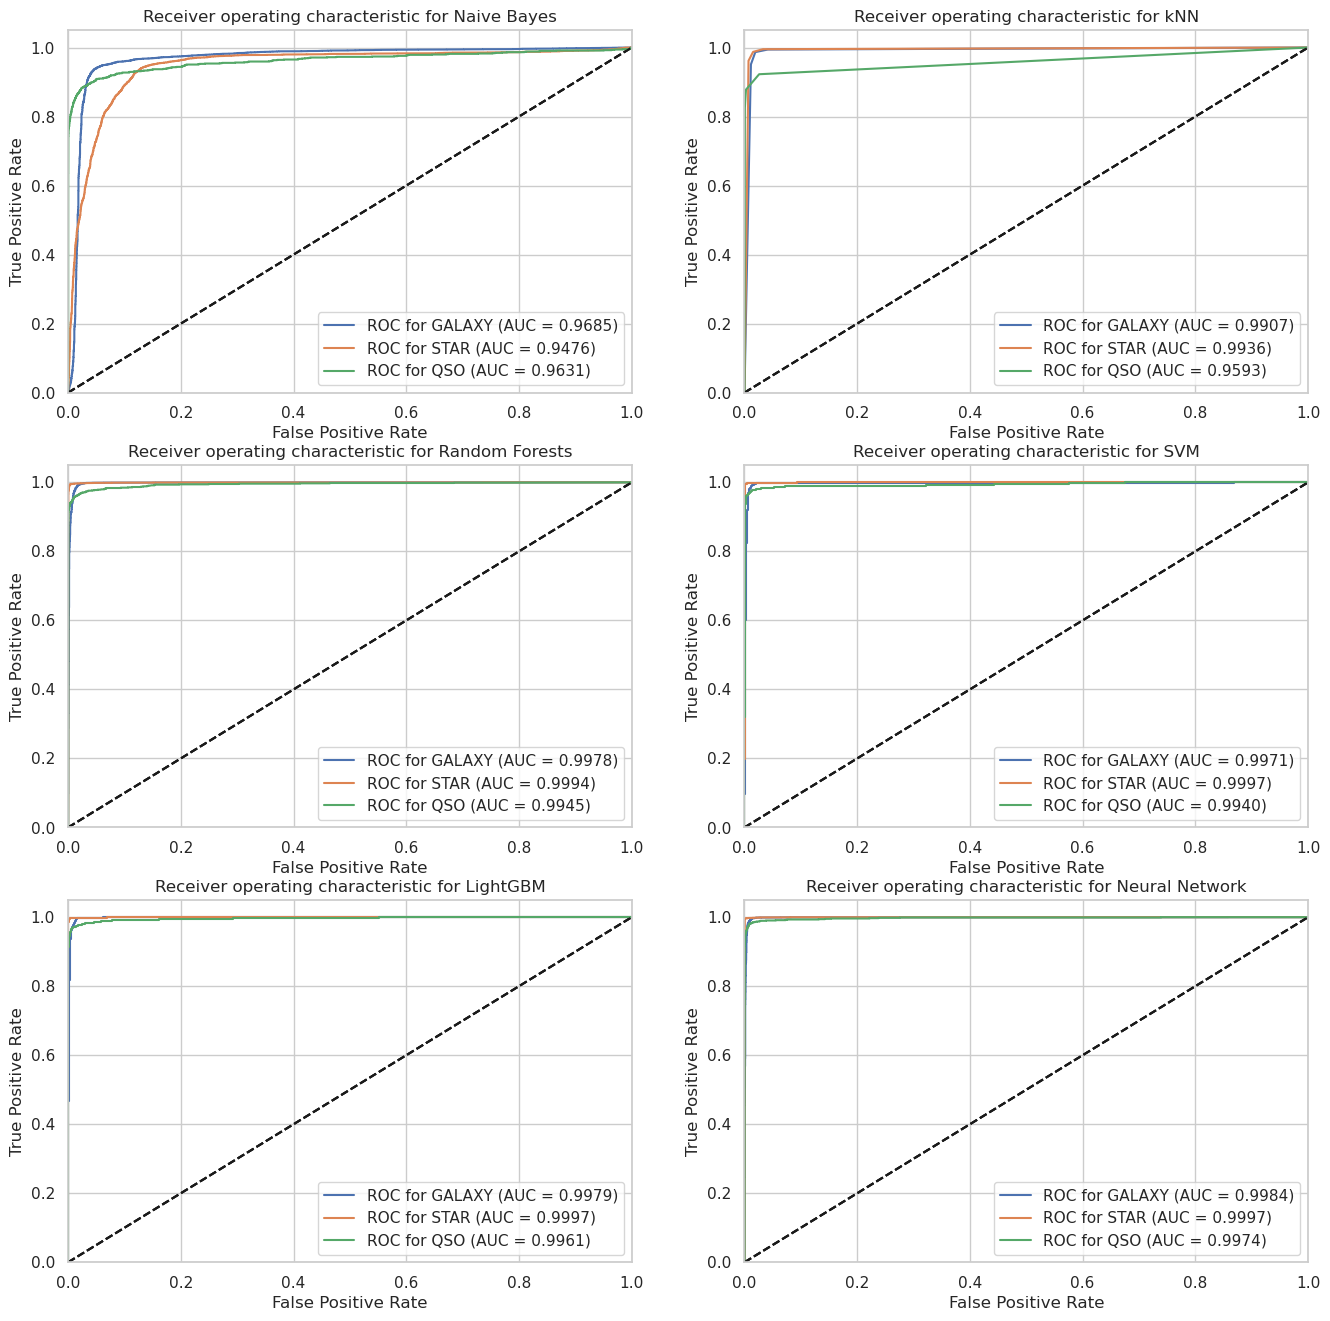

In [175]:
%%time

fig, ax = plt.subplots(3, 2, figsize=(16, 16))

for i, model in enumerate([nb_model_final, knn_model_final, rf_model_final, \
                           CalibratedClassifierCV(svc_model_final), lgbm_model_final, mlp_model_final]):
            
    # If want to plot XGBoost instead of LGBM, add the following
#     if i == 4:
#         xgb_param = model.get_xgb_params()
#         extra = {'num_class': 3}
#         xgb_param.update(extra)
#         model = XGBClassifier(**xgb_param)
        
    if i < 5:
    # Convert to one-versus-the-rest classifier to predict probabilities
        clf = OneVsRestClassifier(model)
        y_score = clf.fit(X_train_clean_pca, y_train_bin).predict_proba(X_valid_clean_pca)
    else:
    # Neural Network already outputs probabilities
        y_score = model.predict(X_valid_clean_pca.values)
    
    # Compute ROC curve and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for j in range(n_classes):
        fpr[j], tpr[j], _ = roc_curve(y_valid_bin[:, j], y_score[:, j])
        roc_auc[j] = auc(fpr[j], tpr[j])

    # Plot of a ROC curve for each specific class
    for j in range(n_classes):
        ax[i//2, i%2].plot(fpr[j], tpr[j], label=f'ROC for {map_int_to_str(j)} (AUC = {roc_auc[j]:.4f})')
        ax[i//2, i%2].plot([0, 1], [0, 1], 'k--')
        ax[i//2, i%2].set_xlim([0.0, 1.0])
        ax[i//2, i%2].set_ylim([0.0, 1.05])
        ax[i//2, i%2].set_xlabel('False Positive Rate')
        ax[i//2, i%2].set_ylabel('True Positive Rate')
        ax[i//2, i%2].set_title(f'Receiver operating characteristic for {model_names[i]}')
        ax[i//2, i%2].legend(loc="lower right")

# 4. Inference

### Prediction
A simple way to handle missing values in the test set is imputation by mean.

Recall in the exploratory analysis section we found several data points with missing values in the training set. We can use those data to "test" this method.

In [262]:
# Try imputation by mean on the missing data in training set
X_train_impute = X_train.copy()
for i in rows_missing:
    for j in cols_missing:
        if X_train_impute.iloc[i][j] == -9999:
            X_train_impute.iloc[i][j] = data_summary_del.loc[j, 'mean']

# Standardize, apply PCA, and then predict
X_train_impute_scaled = pd.DataFrame(scaler.transform(X_train_impute))
Z_train_impute_pca = pca.transform(X_train_impute_scaled)[:, :21]
my_pred = tf.argmax(mlp_model_final.predict(Z_train_impute_pca[rows_missing]), 1)
my_pred = [map_int_to_str(i) for i in my_pred] 

# Check accuracy
my_labels = np.array(y_train.iloc[rows_missing, 0])
print('True labels:', my_labels)
print('Prediction:', my_pred)
print("Accuracy of imputation by mean on training set:", np.mean(my_pred == my_labels))

True labels: ['STAR' 'GALAXY' 'GALAXY' 'GALAXY' 'GALAXY' 'STAR' 'STAR' 'STAR']
Prediction: ['GALAXY', 'STAR', 'GALAXY', 'GALAXY', 'STAR', 'STAR', 'STAR', 'STAR']
Accuracy of imputation by mean on training set: 0.625


Although the accuracy does not seem to be high, if we go back to section 1 and check the feature values of those data, we can notice that many of those data points contain extreme values; so extreme that several galaxy data points appear as if they are stars (e.g. check the magnitude of 'psfFlux'). 

In addition, there are not that many data points with missing values in the test set, so this method is satisfactory for our purpose.

In [295]:
# Predict on the test set
# Impute missing values in test set by the corresponding mean in training set
X_test_impute = X_test.copy()
for i in test_rows_missing:
    for j in test_cols_missing:
        if X_test_impute.iloc[i][j] == -9999:
            X_test_impute.iloc[i][j] = data_summary_del.loc[j, 'mean']

# Standardize, apply PCA, and then predict
X_test_impute_scaled = pd.DataFrame(scaler.transform(X_test_impute))
Z_test_impute_pca = pca.transform(X_test_impute_scaled)[:, :21]
y_test_pred = tf.argmax(mlp_model_final.predict(Z_test_impute_pca), 1)
y_test_pred = [map_int_to_str(i) for i in y_test_pred] 

In [296]:
# Export prediction to csv file
prediction = pd.DataFrame(y_test_pred, columns=['Class'])
prediction.index.name='Index'
prediction.to_csv('FinalPrediction.csv')

As a sanity check, we can compare our prediction to the prediction given (which is known to have an accuracy of 96.6%). Our prediction shouldn't differ too much from it.

In [297]:
# Compare to prediction made by 1-nearest-neighbor, which has 96.6% accuracy on test set
sample_pred = pd.read_csv("myprediction.csv", index_col=0)
np.mean(sample_pred == prediction)

Class    0.96914
dtype: float64

### Generalization error and Variance

Generalization error: As computed before, our neural network model has a generalization risk of 99.15% using a separate validation set. Since *Accuracy* = 1 - *Error Rate* = 1 - *Generalization risk under 0-1 loss*, an estimate for the generalization error is then 0.0085.

To perform sensitivity analysis and have more confidence in our prediction, we can use bootstrap to estimate the variance of our predictor. We will treat our predictor as fixed, so the variance roots from the randomness in new data points.

In [381]:
boot_acc = []

# Use bootstrap resampling to estimate variance of accuracy (hence generalization error)
n_index = X_valid_clean_pca.shape[0]
B = 1000
for i in range(B):
    X_boot, y_boot = resample(X_valid_clean_pca.values, y_valid_clean.values.flatten())
    pred_mlp_boot = tf.argmax(mlp_model_final.predict(X_boot), 1)
    boot_acc.append(np.mean(pred_mlp_boot==y_boot))

print('Bootstrap variance of accuracy:', np.var(boot_acc))
print('Bootstrap standard deviation of accuracy:', np.std(boot_acc))

Bootstrap variance of accuracy: 8.574243899999996e-07
Bootstrap standard deviation of accuracy: 0.0009259721324100415


In [382]:
lower_CI_acc = "{0:.4f}%".format((0.9915-1.96*np.std(boot_acc)) * 100)
upper_CI_acc = "{0:.4f}%".format((0.9915+1.96*np.std(boot_acc)) * 100)
print('Approximate confidence interval for accuracy: ','[',lower_CI_acc, ', ', upper_CI_acc,']', sep='')

lower_CI_err = "{0:.4f}%".format((0.0085-1.96*np.std(boot_acc)) * 100)
upper_CI_err = "{0:.4f}%".format((0.0085+1.96*np.std(boot_acc)) * 100)
print('Approximate confidence interval for generalization error: ','[',lower_CI_err, ', ', upper_CI_err,']', sep='')

Approximate confidence interval for accuracy: [98.9685%, 99.3315%]
Approximate confidence interval for generalization error: [0.6685%, 1.0315%]
